In [1]:
# ----------------------- THIS IS THE BEGINNING OF THE Data_to_Landmarks notebook ----------------------------------

#Importing necessary packages
from pathlib import Path
import numpy as np
import glob
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt
import random
import os
import pandas as pd
import seaborn as sns

## Alphabet
## Preparing for image landmark extraction

In [2]:
#creating a function that takes the landmark data and appends them together and returns that list [4][5]
def ret_landmark_list(landmarks):
    #Creating an empty list for our landmarks [5]
    landmark_point = []

    # Creating a for loop that iterates through our landmarks returns the value and appends to our list [6][4][3]
    for _, landmark in enumerate(hand_landmarks.landmark):
        #After reading the mediapipe issues responses for handtracking specifically mcclanahoochie (Member of Google) and Tectu's (Joel Bodenmann) responses
        # i decided to normalize the x and y coords by image height and width per their recommendation [2]
        landmark_x = (landmark.x * image_width)
        landmark_y = (landmark.y * image_height)
        landmark_z = landmark.z
        # appending the points to the list as floats [4][5]
        landmark_point.append(float(landmark_x))
        landmark_point.append(float(landmark_y))
        landmark_point.append(float(landmark_z))
    #returning the complete list of landmarks [3]
    return landmark_point

In [14]:
#creating a variable of number from a range of 0-63 since we have 63 features (21 landmarks by 3 coords (x,y,z)) [3][7]
nums = range(0,63)
#creating a list of our range of numbers above
lst1 = list(nums)
# inserting the strings 'label' and 'hand' into the 0 and 1 positions of our new list [8]
lst1.insert(0,'label')
lst1.insert(1,'hand')
#creating a dataframe and using our new list as the  column names [9]
data = pd.DataFrame(columns = lst1)

In [15]:
#creating our drawing, styles, and hands variables per the mediapipe documentation [10]
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

#creating our path for our folder to retrieve all files that are in a .png format [1]
#creates windowspath list [1]
path = Path("Train_Alphabet").rglob("*.png")
path2 = Path("Test_Alphabet").rglob("*.png")
#creating an empty list [5]
lst = []
#creating a for loop to iterate through list of windowspaths and create a list of strings [4][3]
for i in path:
    lst.append(str(i))

for i in path2:
    lst.append(str(i))

## Testing images

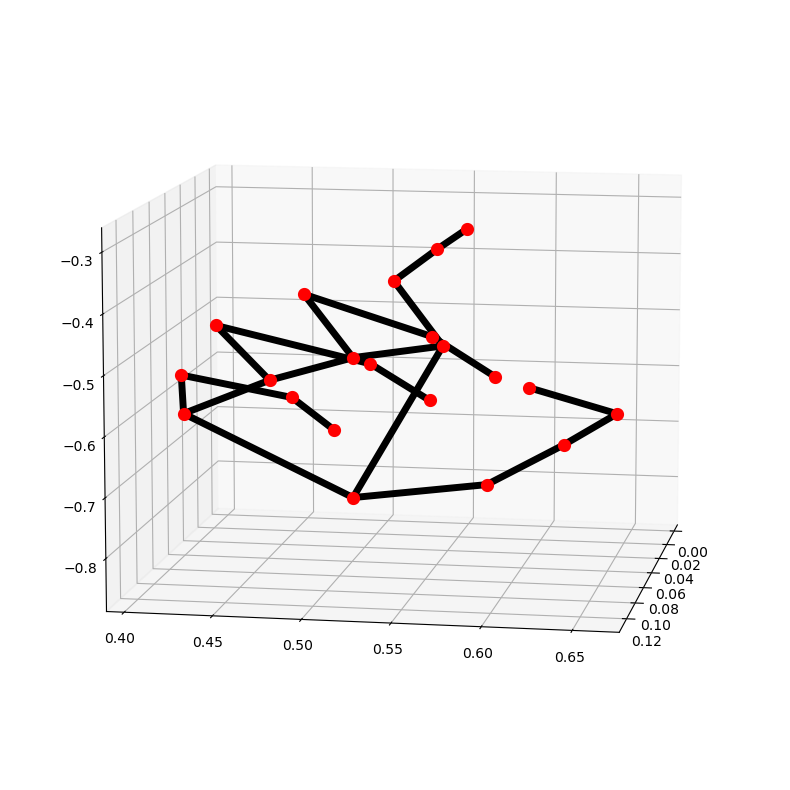

Label for the image is  X


In [16]:
#testing images
#using random to generate a random image from our dataset and establishing our random seed for repeatable outputs [13]
#random.seed(42)
#creating the variable i to store our random string from the previously created list [13]
i = random.choice(lst)
image = i
#using part of the example code from the mediapipe docs and adjusting it for our specific use case to create our visualization via mediapipe Hands  [10]
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5) as hands:
    #creating a variable to hold the 0th instance of the file name retrieved which is the letter [12]
    letter = os.path.basename(os.path.dirname(image))[0]
    # Read an image, flip it around y-axis for correct handedness output [10]
    image = cv2.flip(cv2.imread(image), 1)
    image_height, image_width, _ = image.shape
    # Convert the BGR image to RGB before processing. [10]
    results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    #creating an if statement that takes the image results and if they were successfully processed, it takes that landmarks and plots the data in matplotlib 3D [4][14]
    #if the image was not successfully processed it will return "No landmarks" [4][10][15]
    if not results.multi_hand_landmarks:
        print("No Landmarks.")
    #If successful it takes the landmarks into a for loop and plots the coordinates [4] [10] [14]
    for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.plot_landmarks(
        hand_landmarks, mp_hands.HAND_CONNECTIONS)
#printing the image for our random letter [15]
print("Label for the image is ", letter)

<function matplotlib.pyplot.show(close=None, block=None)>

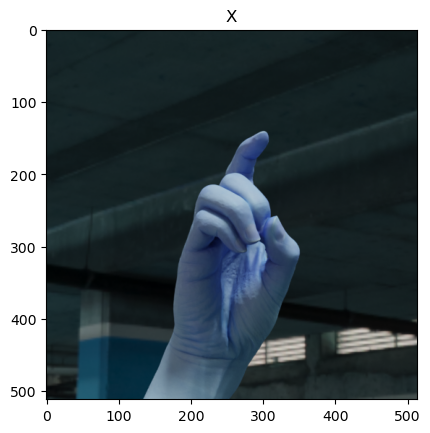

In [17]:
#plotting the initial image from random.choice to verify our above plot matches [16]
plt.imshow(image)
#addign the title [17]
plt.title(letter)
#showing the image [18]
plt.show

## Extracting Landmarks

In [18]:
%%time
#Using the Mediapipe documentation example code and modifying it for our specific use case [10]
#creating a variable to house the list of strings  [5]
IMAGE_FILES = lst
#mediapipe hands class for handling static images [10]
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5) as hands:
  #for loop to iterate through list variable [4][10] 
  for file in IMAGE_FILES:
        #this uses the os normpath to noramlize the file name and uses basename to get the file name [12]
        #creating a variable to hold the 0th instance of the file name retrieved which is the letter [12]
        letter = os.path.basename(os.path.dirname(file))[0]
    # Read an image, flip it around y-axis for correct handedness output [10]
        image = cv2.flip(cv2.imread(file), 1)
        image_height, image_width, _ = image.shape
        # Convert the BGR image to RGB before processing. [10]
        results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        #creating an if statement that takes the image results and if they were successfully processed extracts handeness, landmarks, and label [4][14]
        #if the image was not successfully processed it will continue to the next image [4][10][15]
        if not results.multi_hand_landmarks:
           continue
        #If successful it extracts the handedness via a for loop that i referenced from JinYeJin's response on mediapipe issues [4] [10] [14] [19]
        for _, handedness in enumerate(results.multi_handedness):
            hand = handedness.classification[0].label
        #creates a for loop that takes each instance of file and passes the files landmarks to our retrieve landmark
        #function inserts our letter variable from that file name and handedness and appends it to our dataframe [3] [4] [10] [14] [20]
        for hand_landmarks in results.multi_hand_landmarks:
            landmark_list = ret_landmark_list(hand_landmarks)
            landmark_list.insert(0, letter)
            landmark_list.insert(1, hand)
            data.loc[len(data)] = landmark_list

CPU times: total: 7min 57s
Wall time: 19min 5s


In [9]:
#creates a .csv file of our dataframe [21]
data.to_csv('img_alpha_dataset.csv', sep=',',index=False, encoding='utf-8')

# Numbers Dataset to .CSV

Doing the same thing I did for the Alphabet datset creation to the numbers images

In [3]:
#creating a variable of number from a range of 0-63 since we have 63 features (21 landmarks by 3 coords (x,y,z)) [3][7]
nums = range(0,63)
#creating a list of our range of numbers above
lst2 = list(nums)
# inserting the strings 'label' and 'hand' into the 0 and 1 positions of our new list [8]
lst2.insert(0,'label')
lst2.insert(1,'hand')
#creating a dataframe and using our new list as the  column names [9]
data2 = pd.DataFrame(columns = lst2)

In [4]:
#creating our drawing, styles, and hands variables per the mediapipe documentation [10]
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

#creating our path for our folder to retrieve all files that are in a .png format [1]
#creates windowspath list [1]
path_nums = Path("Train_Nums").rglob("*.png")
path_nums2 = Path("Test_Nums").rglob("*.png")
#creating an empty list [5]
num_lst = []
#creating a for loop to iterate through list of windowspaths and create a list of strings [4][3]
for i in path_nums:
    num_lst.append(str(i))

for i in path_nums2:
    num_lst.append(str(i))

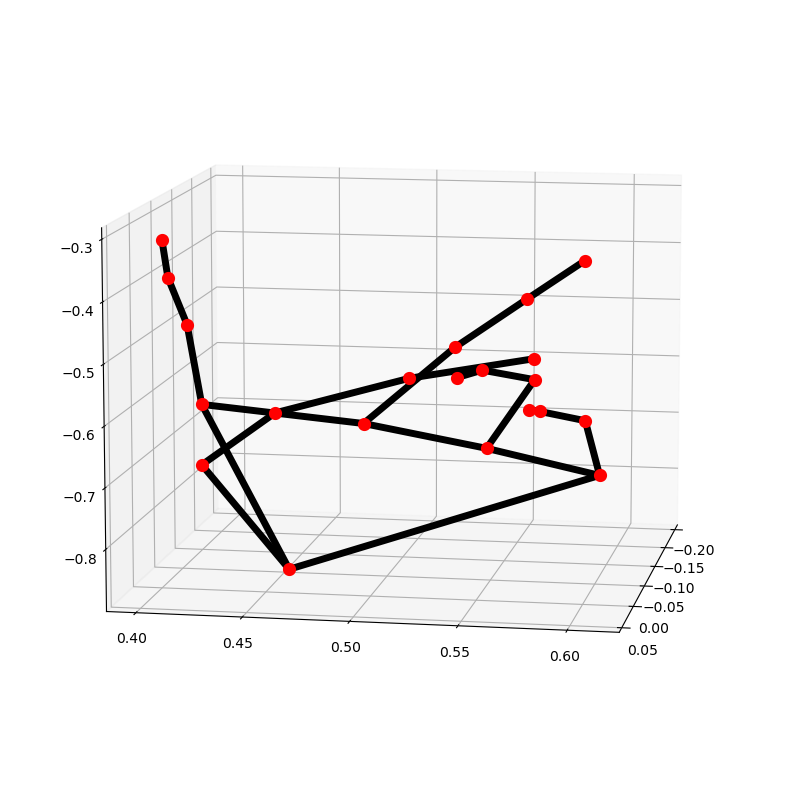

Label for the image is  2


In [5]:
#testing images

#establishing our random seed for repeatable outputs [13]
#random.seed(42)
#creating the variable i as in integer to store our random integer [13]
i = random.choice(num_lst)
image = i
#using part of the example code from the mediapipe docs and adjusting it for our specific use case to create our visualization via mediapipe Hands  [10]
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5) as hands:
    #creating a variable to hold the 0th instance of the file name retrieved which is the number [12]
    number = os.path.basename(os.path.dirname(image))[:]
    # Read an image, flip it around y-axis for correct handedness output [10]
    image = cv2.flip(cv2.imread(image), 1)
    image_height, image_width, _ = image.shape
    # Convert the BGR image to RGB before processing.[10]
    results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    #creating an if statement that takes the image results and if they were successfully processed, it takes that landmarks and plots the data in matplotlib 3D [4][14]
    #if the image was not successfully processed it will returnt "No landmarks" [4][10][15]
    if not results.multi_hand_landmarks:
        print("No Landmarks.")
    #IF successful it takes the landmarks into a for loop and plots the coordinates [4] [10] [14]
    for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.plot_landmarks(
        hand_landmarks, mp_hands.HAND_CONNECTIONS)
#printing the image for our random integer [15]
print("Label for the image is ", number)

<function matplotlib.pyplot.show(close=None, block=None)>

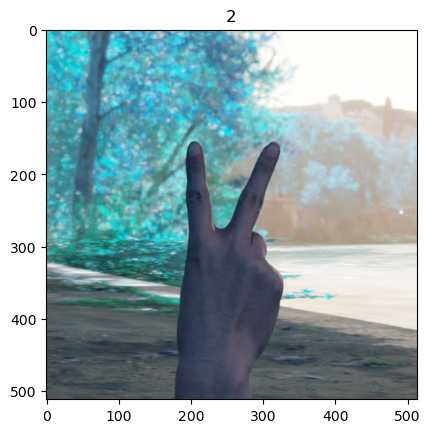

In [6]:
#plotting the initial image from random.choice to verify our above plot matches [16]
plt.imshow(image)
#addign the title [17]
plt.title(number)
#showing the image [18]
plt.show

In [8]:
%%time
#Using the Mediapipe documentation example code and modifying it for our specific use case [10]
#creating a variable to house the list of strings  [5]
IMAGE_FILES = num_lst
#mediapipe hands class for handling static images [10]
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5) as hands:
  #for loop to iterate through list variable  [4] [10]
  for file in IMAGE_FILES:
        #this uses the os normpath to noramlize the file name and uses basename to get the file name [12]
        #creating a variable to hole the 0th instance of the file name retrieved which is the letter [12]
        number = os.path.basename(os.path.dirname(file))[:]
    # Read an image, flip it around y-axis for correct handedness output [10] 
        image = cv2.flip(cv2.imread(file), 1)
        image_height, image_width, _ = image.shape
        # Convert the BGR image to RGB before processing. [10]
        results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        #creating an if statement that takes the image results and if they were successfully processed extracts handeness, landmarks, and label [4][14]
        #if the image was not successfully processed it will continue to the next image [4][10][15]
        if not results.multi_hand_landmarks:
           continue
        #If successful it extracts the handedness via a for loop that i referenced from JinYeJin's response on mediapipe issues [4] [10] [14] [19]
        for _, handedness in enumerate(results.multi_handedness):
            hand = handedness.classification[0].label
        #creates a for loop that takes each instance of file and passes the files landmarks to our retrieve landmark
        #function inserts our letter variable from that file name and appends it to our dataframe [3] [4] [10] [14] [20]
        for hand_landmarks in results.multi_hand_landmarks:
            landmark_list = ret_landmark_list(hand_landmarks)
            landmark_list.insert(0, number)
            landmark_list.insert(1, hand)
            data2.loc[len(data2)] = landmark_list

CPU times: total: 3min 43s
Wall time: 7min 2s


In [12]:
np.unique(data2.label)

array(['1', '10', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [13]:
#creates a .csv file of our dataframe [21]
data2.to_csv('img_nums_dataset.csv', sep=',',index=False, encoding='utf-8')

### References:
    [1] “pathlib — Object-oriented filesystem paths — Python 3.9.4 documentation,” docs.python.org. https://docs.python.org/3/library/pathlib.html
    [2] “Hand tracking landmarks - Z value range · Issue #742 · google/mediapipe,” GitHub. https://github.com/google/mediapipe/issues/742#issuecomment-639104199 (accessed Sep. 19, 2023).
    [3]“Built-in Functions — Python 3.8.3 documentation,” docs.python.org. https://docs.python.org/3/library/functions.html
    [4] “4. More Control Flow Tools,” Python documentation. https://docs.python.org/3/tutorial/controlflow.html#defining-functions
    [5] “5. Data Structures — Python 3.8.3 documentation,” docs.python.org. https://docs.python.org/3/tutorial/datastructures.html
    [6] D. Chosnek, “How To Use Underscore (_) Properly in Python,” Medium, Jan. 05, 2023. https://betterprogramming.pub/how-to-use-underscore-properly-in-python-37df5e05ba4c (accessed Sep. 19, 2023).
    [7] “Hand landmarks detection guide | MediaPipe,” Google Developers. https://developers.google.com/mediapipe/solutions/vision/hand_landmarker
    [8] “array — Efficient arrays of numeric values — Python 3.11.0 documentation,” docs.python.org. https://docs.python.org/3/library/array.html
    [9] “pandas.DataFrame — pandas 1.2.4 documentation,” pandas.pydata.org. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
    [10] “layout: forward target: https://developers.google.com/mediapipe/solutions/vision/hand_landmarker title: Hands parent: MediaPipe Legacy Solutions nav_order: 4 — MediaPipe v0.7.5 documentation,” mediapipe.readthedocs.io. https://mediapipe.readthedocs.io/en/latest/solutions/hands.html (accessed Sep. 19, 2023).
    [11] Python, “os — Miscellaneous operating system interfaces — Python 3.8.0 documentation,” Python.org, 2019. https://docs.python.org/3/library/os.html
    [12] “os.path — Common pathname manipulations — Python 3.9.2 documentation,” docs.python.org. https://docs.python.org/3/library/os.path.html#module-os.path
    [13] “random — Generate pseudo-random numbers,” Python documentation. https://docs.python.org/3/library/random.html?highlight=random#module-random (accessed Sep. 19, 2023).
    [14] “mediapipe/mediapipe/python/solutions/drawing_utils.py at master · google/mediapipe,” GitHub. https://github.com/google/mediapipe/blob/master/mediapipe/python/solutions/drawing_utils.py?ref=assemblyai.com (accessed Sep. 19, 2023).
    [15] “2to3 — Automated Python 2 to 3 code translation,” Python documentation. https://docs.python.org/3/library/2to3.html?highlight=print#to3fixer-print (accessed Sep. 19, 2023).
    [16] “matplotlib.pyplot.imshow — Matplotlib 3.5.2 documentation,” matplotlib.org. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
    [17] “matplotlib.pyplot.title — Matplotlib 3.6.0 documentation,” matplotlib.org. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html
    [18] “matplotlib.pyplot.show — Matplotlib 3.5.1 documentation,” matplotlib.org. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html
    [19] “How to properly get detected handedness (Python) · Issue #1374 · google/mediapipe,” GitHub. https://github.com/google/mediapipe/issues/1374 (accessed Sep. 19, 2023).
    [20] “pandas.DataFrame.loc — pandas 2.1.0 documentation,” pandas.pydata.org. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html#pandas.DataFrame.loc (accessed Sep. 19, 2023).
    [21] “pandas.DataFrame.to_csv — pandas 2.1.0 documentation,” pandas.pydata.org. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html#pandas.DataFrame.to_csv (accessed Sep. 19, 2023).


    